# Tu primer random forest con scikit-learn

In [11]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [3]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('../data/diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploración de datos

In [4]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
469,6,154,78,41,140,46.1,0.571,27,0
95,6,144,72,27,228,33.9,0.255,40,0
105,1,126,56,29,152,28.7,0.801,21,0
53,8,176,90,34,300,33.7,0.467,58,1
453,2,119,0,0,0,19.6,0.832,72,0
591,2,112,78,50,140,39.4,0.175,24,0
375,12,140,82,43,325,39.2,0.528,58,1
561,0,198,66,32,274,41.3,0.502,28,1
289,5,108,72,43,75,36.1,0.263,33,0
100,1,163,72,0,0,39.0,1.222,33,1


In [5]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [6]:
#Verificacion de datos
df_diabetes

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

Tambien, hay columnas que tienen missing values pero de manera implicita. Se reconocen por que su valor es 0 y a nivel medico, no tendria sentido ese valor.

In [13]:
(
    df_diabetes
    .iloc[:, 1:6].replace(to_replace=[0], value=np.nan)
    .isna().sum()
    .reset_index(name = 'missing_values')
    .rename(columns={"index": "variable"})
    .assign( percentage = lambda df_reset: df_reset.missing_values / len(df_reset) * 100)
)

,variable,missing_values,percentage
0,2. Plasma glucose concentration a 2 hours in a...,5,100.0
1,3. Diastolic blood pressure (mm Hg),35,700.0
2,4. Triceps skin fold thickness (mm),227,4540.0
3,5. 2-Hour serum insulin (mu U/ml),374,7480.0
4,6. Body mass index (weight in kg/(height in m)^2),11,220.0


In [15]:
# De igual manera esto solo fue una claridad, y no se trabajará para el modelo a construir
df_diabetes.isna().sum()

1. Number of times pregnant                                                    0
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
3. Diastolic blood pressure (mm Hg)                                            0
4. Triceps skin fold thickness (mm)                                            0
5. 2-Hour serum insulin (mu U/ml)                                              0
6. Body mass index (weight in kg/(height in m)^2)                              0
7. Diabetes pedigree function                                                  0
8. Age (years)                                                                 0
9. Class variable (0 or 1)                                                     0
dtype: int64

In [16]:
#Analizamos el shape del objeto
df_diabetes.shape

(768, 9)

In [17]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [18]:
#Separamos en X e y
X, y = df_diabetes.drop('9. Class variable (0 or 1)', axis= 1), df_diabetes['9. Class variable (0 or 1)']

In [19]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [20]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo                    # Se empieza con un valor pequeño
random_forest = RandomForestClassifier(n_estimators = 10, random_state = 00000)

In [21]:
#Entrenamiento

random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [22]:
#Calculo de las predicciones en Train y Test

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [24]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
accuracy_train = accuracy_score(y_train, y_train_pred)


#Calculo el accuracy en Test
accuracy_test = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es: ', accuracy_train)
print('El accuracy en test es: ', accuracy_test)


El accuracy en train es:  0.9776536312849162
El accuracy en test es:  0.7662337662337663


Notemos que está teniendo un buen rendimiento en el conjunto de entrenamiento, pero no en el conjunto de test. Esto puede ser debido a que el modelo está sobreajustando los datos de entrenamiento. luego, con hiperparameter tuning, se puede mejorar el rendimiento del modelo, y balancear el trade-off entre sesgo y varianza.

In [28]:
#Verificamos el feature importances, en este caso un poco distinto que como se había hecho

feature_importances_ = (
    pd.DataFrame({'feature': list(X.columns), 'importance': random_forest.feature_importances_})
    .sort_values('importance', ascending=0)
)



# Mostrar
feature_importances_

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.252983
7,8. Age (years),0.172710
5,6. Body mass index (weight in kg/(height in m)^2),0.157963
6,7. Diabetes pedigree function,0.118139
3,4. Triceps skin fold thickness (mm),0.086799
2,3. Diastolic blood pressure (mm Hg),0.074944
4,5. 2-Hour serum insulin (mu U/ml),0.073305
0,1. Number of times pregnant,0.063155


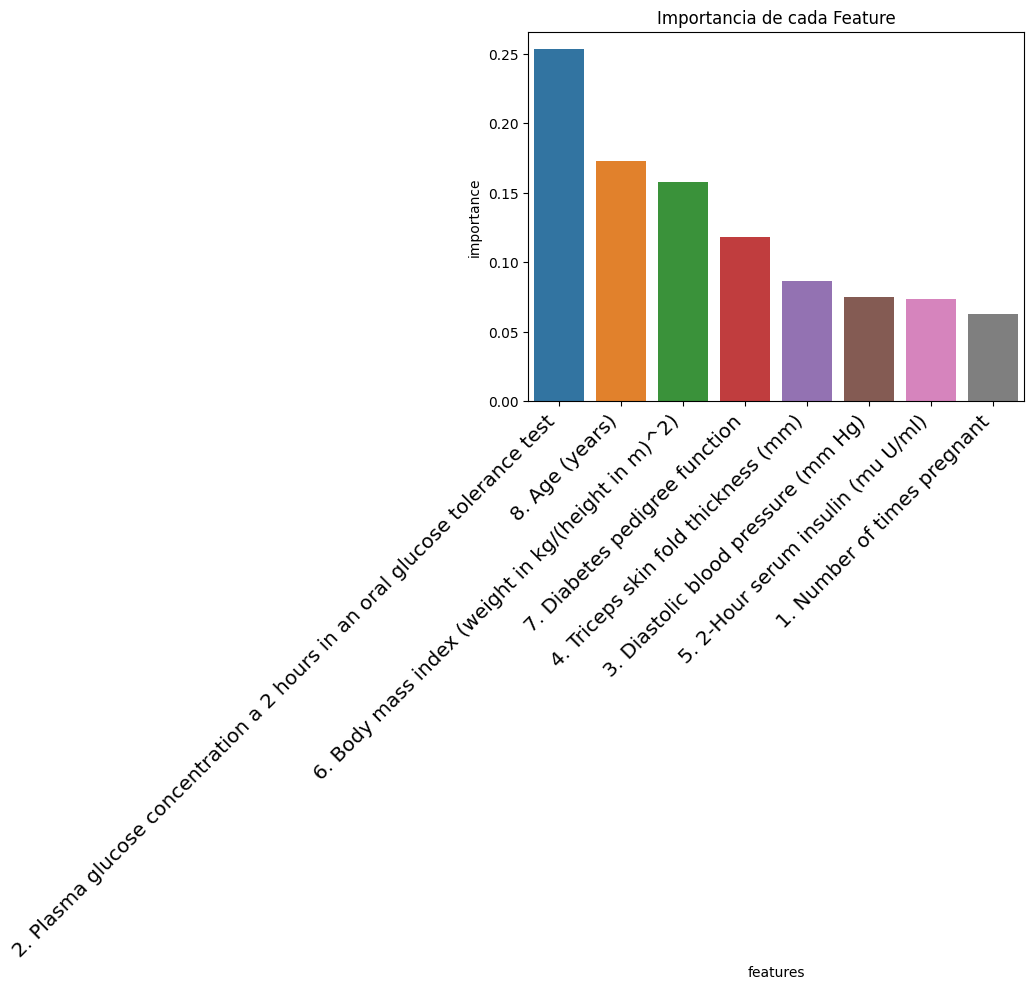

In [33]:
import seaborn as sns

sns.barplot(x=feature_importances_.feature, y=feature_importances_.importance)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light', fontsize='x-large')
plt.xlabel('feature importance score')
plt.xlabel('features')
plt.title('Importancia de cada Feature')
plt.show()


**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**

**Hyperparameter tuning con Grid SearchCV**
Repliqué el algoritmo de random forest usando GridSearchCV para encontrar la mejor combinación de parámetros. El código es:

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

parametros = {
  'n_estimators' : range(4,101),
  'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
  'max_depth' : range(2,11)
  }

rf_grid = GridSearchCV(rf, parametros, cv = 5, scoring='accuracy').fit(X,y)

El mejor modelo tiene las combinaciones:

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 22}

Y el accuracy fue de 0.7888549359137594 usando CV.